In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2
import matplotlib.patches as mpatches
import colorsys

In [110]:
transect_data_path = '../data/generated/transect_data/'

In [111]:
df_data = jb.load('../data/generated/df_newimages_bands_downside.pkl.z')
df_data

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7
0,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784
1,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784
2,233,1132,3.299687,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824
3,233,1133,3.268182,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,1.175411,1.111754,0.421458,0.322339,-0.172881,23.158824
4,233,1134,3.278125,0.1196,0.0884,0.0677,0.0454,0.0489,0.0323,0.0285,0.0238,1.174645,1.104724,0.419585,0.321375,-0.161235,23.607309
5,233,1135,3.294375,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,1.171288,1.110496,0.419585,0.315110,-0.168367,23.607309
6,233,1136,3.353030,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,1.171894,1.105480,0.422963,0.316149,-0.163072,24.852202
7,233,1137,3.381500,0.1196,0.0886,0.0660,0.0451,0.0485,0.0317,0.0296,0.0233,1.177283,1.099970,0.422963,0.325355,-0.152838,24.852202
8,234,1003,2.230000,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,1.149791,1.090009,0.376828,0.286115,-0.133698,28.922021
9,234,1004,2.229857,0.1224,0.0917,0.0734,0.0514,0.0540,0.0336,0.0323,0.0264,1.146938,1.090436,0.387755,0.281621,-0.152276,27.977559


In [112]:
model = jb.load('../data/generated/rf_model.pkl.z')

In [113]:
z = model.predict(df_data.drop(['x','y','z'],axis=1))

In [115]:
df_data['z_pred'] = z
df_data['error'] = df_data['z_pred'] - df_data['z']
df_data['abs_error'] = abs(df_data['error'])

In [116]:
df_result = df_data.drop(['b1','b2','b3','b4','b5','b6','b7','b8','b2b4','b3b4','ndwi15','ndwi24','ndwi53'],axis=1)

In [117]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [118]:
df_depth = df_result.drop(['x','y','z_pred','z'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','cspm','mean_error','mean_abs_error']
df_depth

,depth_round_down,cspm,mean_error,mean_abs_error
0,1.0,21.609668,0.972438,0.976408
1,2.0,21.421786,0.690224,0.722759
2,3.0,21.433598,0.599433,0.717637
3,4.0,21.207139,0.455730,0.655946
4,5.0,20.116021,0.308155,0.670006
5,6.0,19.595476,0.094860,0.730252
6,7.0,19.221706,-0.046492,0.729849
7,8.0,18.987919,-0.072539,0.815428
8,9.0,18.675887,-0.368310,0.903280
9,10.0,18.671460,-0.511922,1.029864


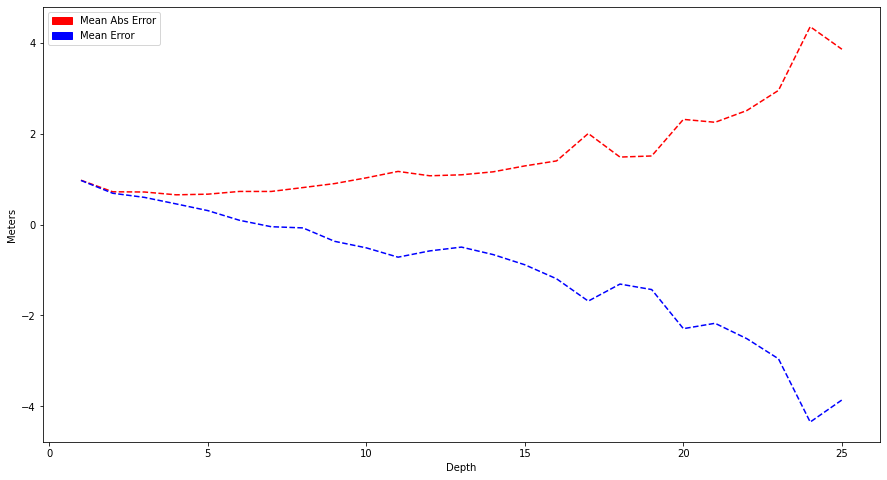

In [119]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_error'], 'b--')
red = mpatches.Patch(color='red', label='Mean Abs Error')
blue = mpatches.Patch(color='blue', label='Mean Error')
plt.legend(handles=[red,blue])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig('../data/generated/chart_mean_error.jpg')
plt.show()

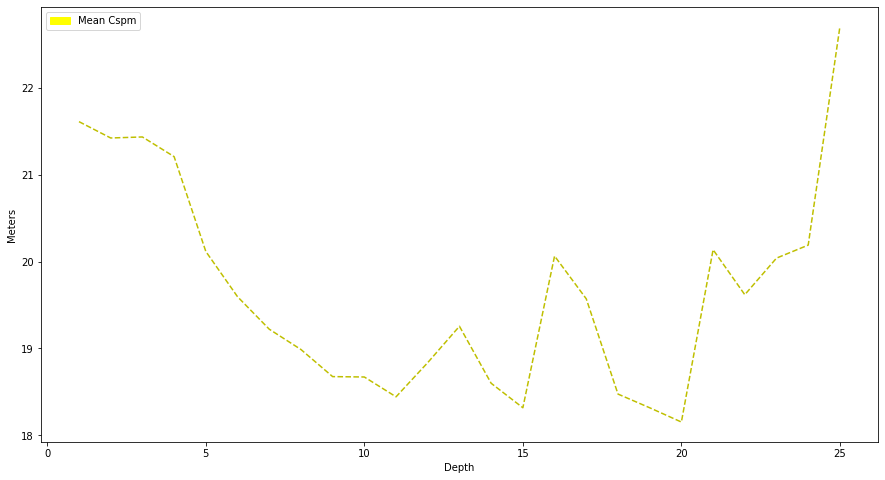

In [120]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['cspm'], 'y--')
yellow = mpatches.Patch(color='yellow', label='Mean Cspm')
plt.legend(handles=[yellow])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig('../data/generated/chart_mean_cspm.jpg')
plt.show()

In [121]:
def find_transect(x_s,y_s,x_e,y_e,df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        x = row[1]
        y = row[2]
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect.append(row)
    return transect
    

In [122]:
base_image = cv2.imread('../data/generated/rgb_image.jpg')

In [124]:
transects_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = row[1]
    y = row[2]
    transects_image[y][x] = [255,255,255]
cv2.imwrite('../data/generated/bat_transects.jpg',transects_image)

True

In [125]:
df_data

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,z_pred,error,abs_error
0,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784,3.275670,0.079808,0.079808
1,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784,3.244124,-0.028906,0.028906
2,233,1132,3.299687,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824,3.326227,0.026540,0.026540
3,233,1133,3.268182,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,1.175411,1.111754,0.421458,0.322339,-0.172881,23.158824,3.010721,-0.257461,0.257461
4,233,1134,3.278125,0.1196,0.0884,0.0677,0.0454,0.0489,0.0323,0.0285,0.0238,1.174645,1.104724,0.419585,0.321375,-0.161235,23.607309,3.032032,-0.246093,0.246093
5,233,1135,3.294375,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,1.171288,1.110496,0.419585,0.315110,-0.168367,23.607309,3.243690,-0.050685,0.050685
6,233,1136,3.353030,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,1.171894,1.105480,0.422963,0.316149,-0.163072,24.852202,3.353061,0.000031,0.000031
7,233,1137,3.381500,0.1196,0.0886,0.0660,0.0451,0.0485,0.0317,0.0296,0.0233,1.177283,1.099970,0.422963,0.325355,-0.152838,24.852202,3.178737,-0.202763,0.202763
8,234,1003,2.230000,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,1.149791,1.090009,0.376828,0.286115,-0.133698,28.922021,2.842028,0.612028,0.612028
9,234,1004,2.229857,0.1224,0.0917,0.0734,0.0514,0.0540,0.0336,0.0323,0.0264,1.146938,1.090436,0.387755,0.281621,-0.152276,27.977559,2.842559,0.612702,0.612702


In [131]:
abs_error_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row[1])
    y = int(row[2])
    abs_error = row[-1]
    abs_error_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(abs_error/(df_data['abs_error'].max()*1.2), 0.5, 1))]

cv2.imwrite('../data/generated/abs_error.jpg',cv2.cvtColor(abs_error_image, cv2.COLOR_BGR2RGB))

True

In [137]:
def generate_transect_charts(df_data,coords,path,image):
    transect = find_transect(coords[0],coords[1],coords[2],coords[3],df_data)

    transect_image = image.copy()
    for i, row in enumerate(transect):
        x = row[1]
        y = row[2]
        transect_image[y][x] = [0,255,0]
    cv2.imwrite(f'{path}bat_single_transect_{coords[0]}_{coords[1]}.jpg',transect_image)

    df_transect = pd.DataFrame(transect)
    df_transect.drop(['Index'],axis=1,inplace=True)

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],-df_transect['z'], 'r.', df_transect['x'],-df_transect['z_pred'], 'b.')
    red = mpatches.Patch(color='red', label='Bathymetry')
    blue = mpatches.Patch(color='blue', label='Prediction')
    plt.legend(handles=[red,blue])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Depth(m)")
    plt.savefig(f'{path}chart_bat_pred_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['error'], 'g.')
    lbl = mpatches.Patch(color='green', label='Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_error_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['abs_error'], 'm.')
    lbl = mpatches.Patch(color='magenta', label='Abs Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_abs_error_{coords[0]}_{coords[1]}.jpg')

In [138]:
transect_coords = [[510,410,680,310],
                   [1604,142,1772,440],
                   [871,1123,1190,939],
                   [1020,705,1319,532]]

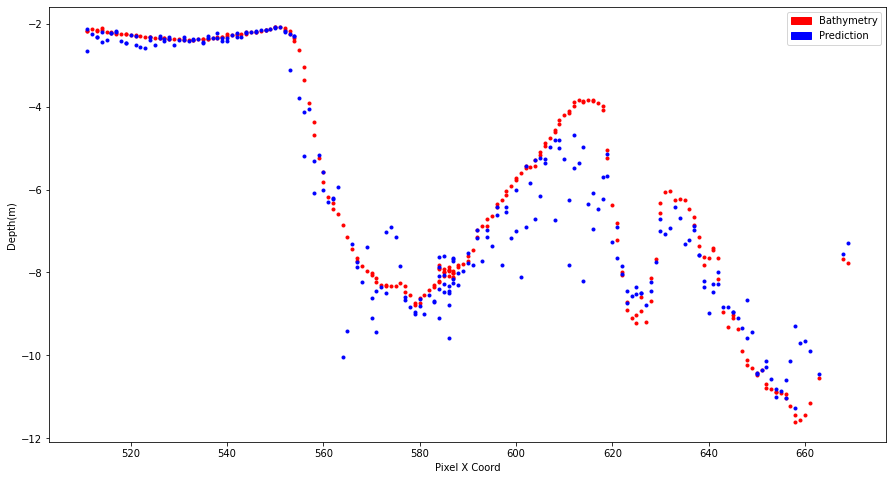

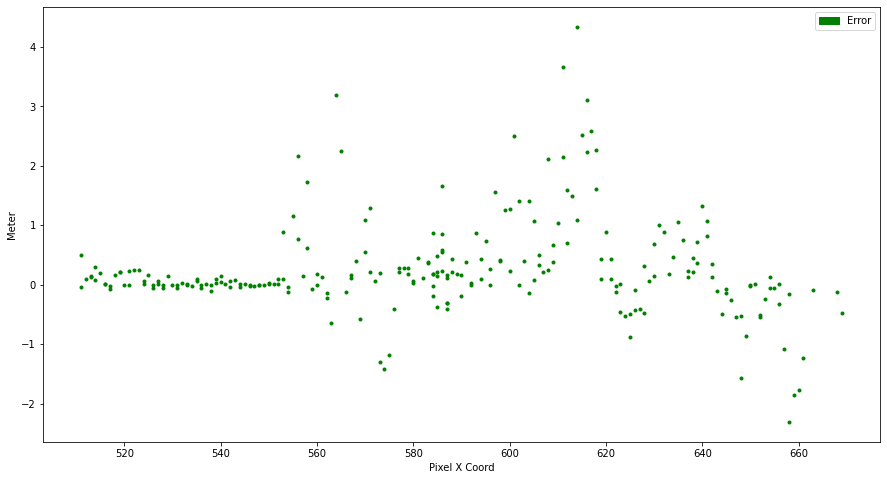

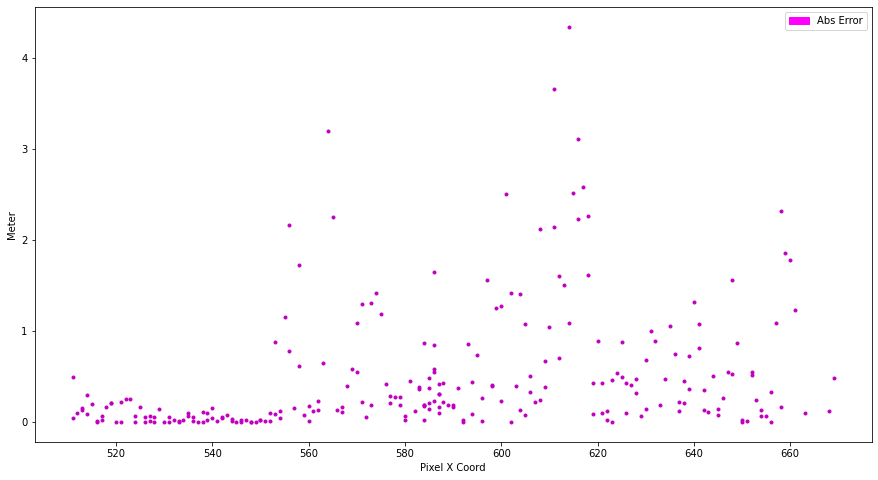

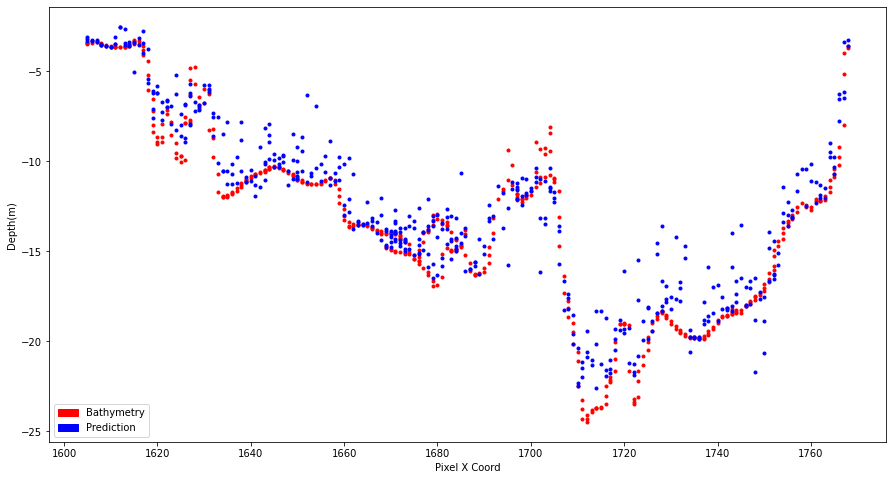

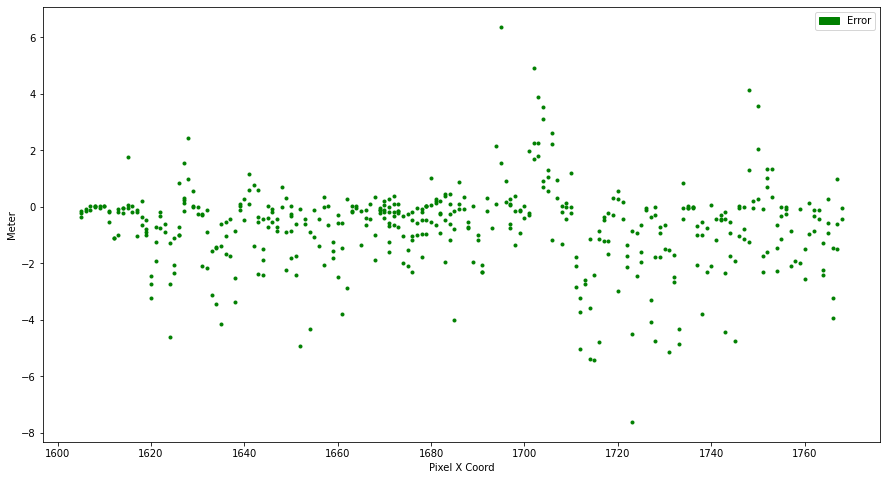

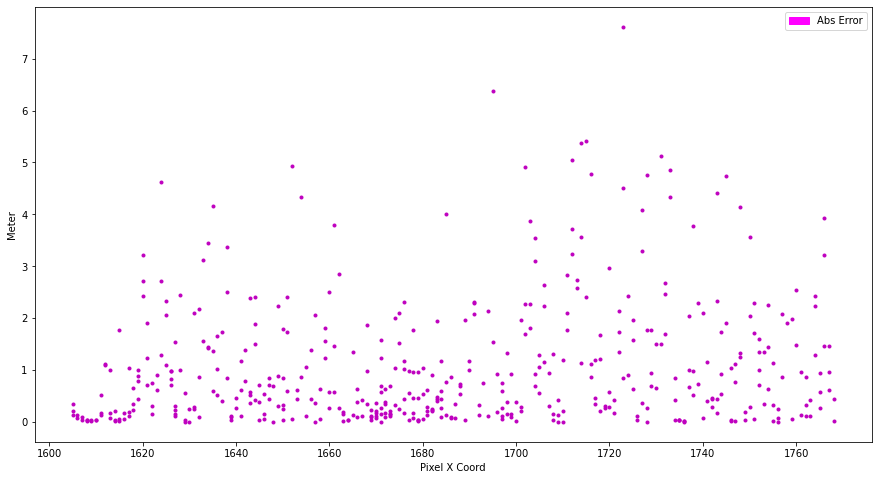

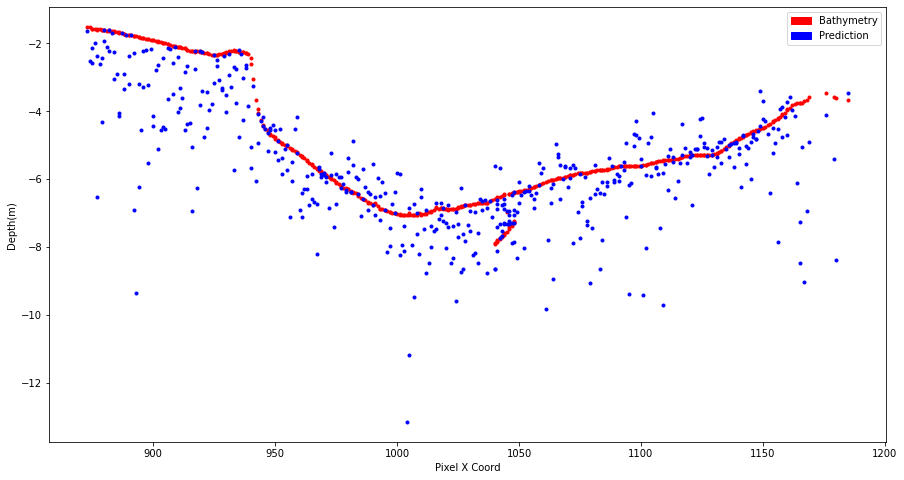

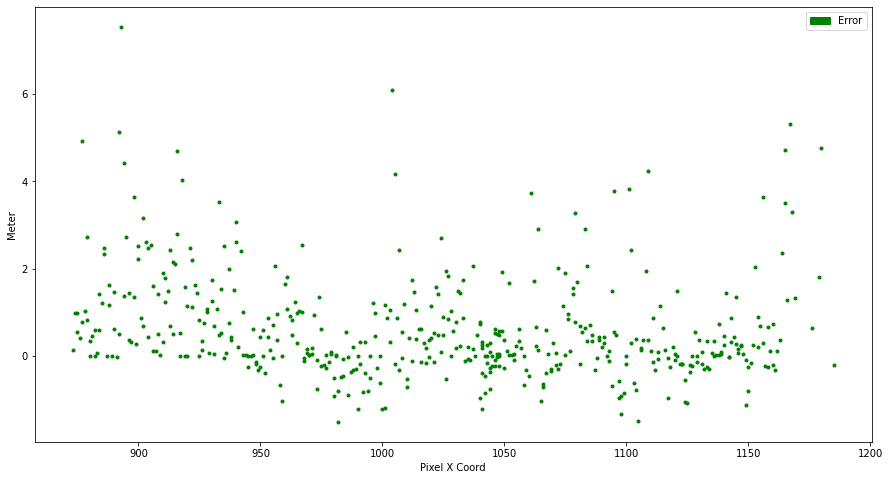

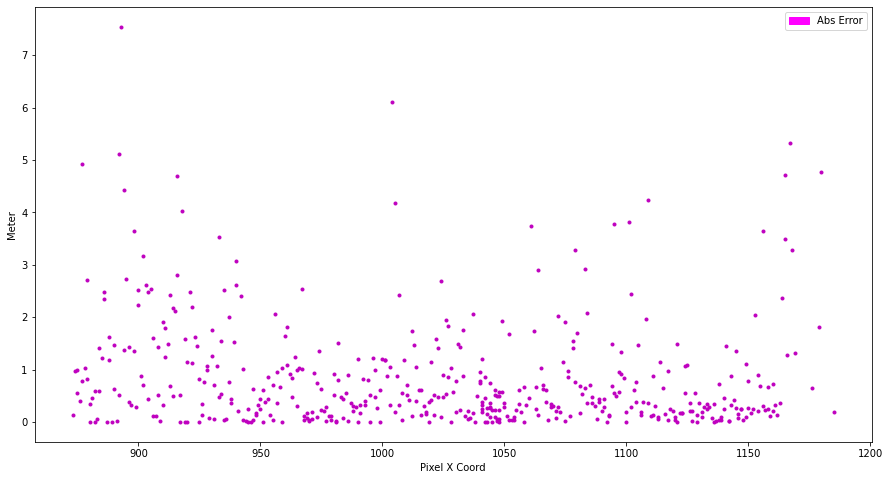

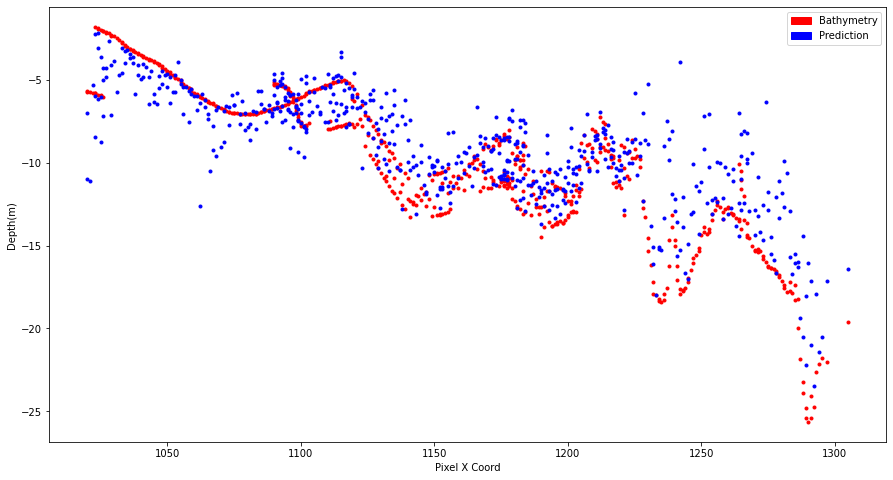

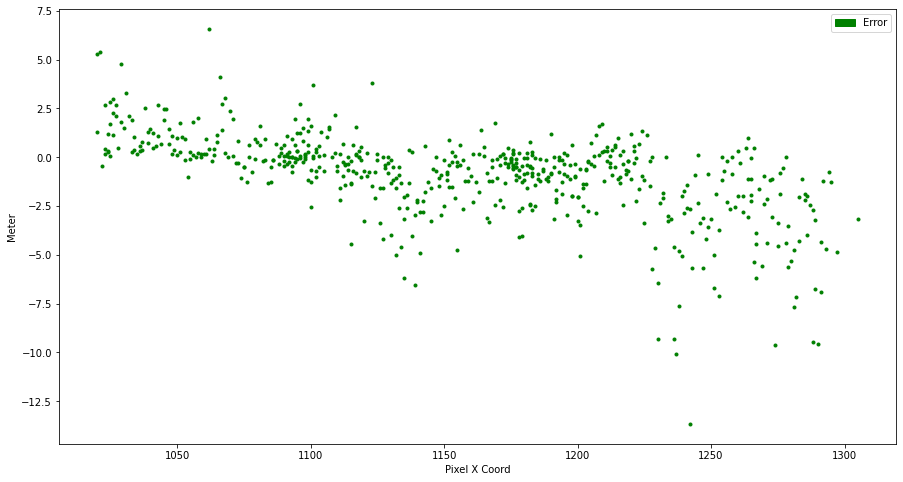

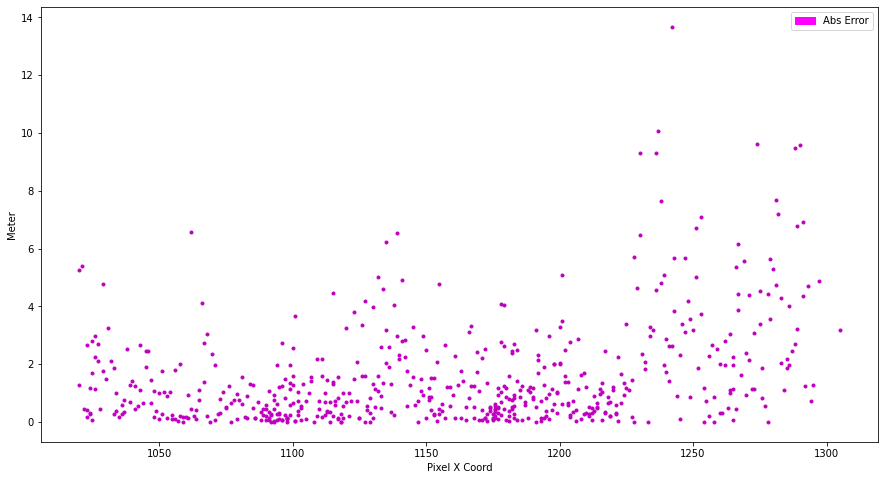

In [139]:
for i, coords in enumerate(transect_coords):
    generate_transect_charts(df_data,coords,transect_data_path,transects_image)